### Quantum Game Theory

Quantum Game Theory merges classical game theory with quantum mechanics, offering new strategies and potential outcomes in decision-making processes. This fascinating intersection reveals how quantum strategies can outperform classical ones, especially in competitive scenarios.

Classical game theory studies strategic interactions where players make decisions to maximize their payoffs. It is widely used in economics, political science, and biology. However, it is limited by classical probabilities and deterministic strategies. Quantum game theory, on the other hand, introduces quantum strategies and quantum entanglement, leading to more diverse and sometimes counterintuitive outcomes.

One of the intriguing aspects of quantum game theory is the use of quantum superposition and entanglement. These principles allow players to employ strategies that are not possible in classical settings. For example, in the famous Prisoner's Dilemma game, players using quantum strategies can achieve a better collective outcome compared to classical strategies. This happens because quantum entanglement allows for a level of coordination between players that is impossible classically.

Quantum game theory also leverages the concept of quantum bits or qubits. Unlike classical bits, qubits can exist in multiple states simultaneously, thanks to superposition. This allows for the exploration of a broader range of strategies and outcomes. When these qubits are entangled, the state of one qubit is directly related to the state of another, regardless of the distance separating them. This entanglement can lead to superior strategies and increased payoffs.

Implementing quantum game theory in practice involves using quantum circuits to simulate game scenarios. These circuits manipulate qubits through quantum gates, and the outcomes are measured to determine the players' strategies and payoffs. Quantum simulators like those in Qiskit can be used to model these scenarios, offering insights into how quantum strategies can be optimized.

The potential applications of quantum game theory are vast. In economics, it can model complex market behaviors and improve auction designs. In cybersecurity, it can enhance cryptographic protocols. In social sciences, it can provide deeper insights into human behavior and decision-making processes. As quantum computing technology advances, the practical implications of quantum game theory will become increasingly significant, driving innovation across various fields.

By understanding and leveraging quantum game theory, researchers and practitioners can unlock new strategies and solutions that were previously unimaginable. The integration of quantum mechanics into game theory not only enriches our understanding of strategic interactions but also opens up a realm of possibilities for future technological advancements.

Below is IBM's Qiskit implementation of Quantum Prisoner's Dilemma. 

In the implementation we do the following:

###### Initialization
- A quantum circuit with 2 qubits and 2 classical bits is created.

- A Hadamard gate is applied to both qubits to create superposition.

- A controlled-NOT (CNOT) gate entangles the qubits.
###### Player Strategies
- Pauli-X gates simulate the strategies of the players. In this case, both players are set to defect (Pauli-X applied).

###### Measurement
- Another CNOT gate and Hadamard gate are applied to bring the qubits to a state that can be measured.
- The qubits are measured and the results are stored in the classical bits.

###### Simulation and Results
- The quantum circuit is transpiled and assembled for the AerSimulator.

- The circuit is executed, and the results (counts) are retrieved.

- The original and transpiled circuits are drawn, and the measurement results are plotted as a histogram.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the Quantum Prisoner's Dilemma game circuit
def quantum_prisoners_dilemma():
    # Initialize the quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply a Hadamard gate to create superposition
    qc.h([0, 1])

    # Apply a controlled-NOT (CNOT) gate to entangle the qubits
    qc.cx(0, 1)

    # Apply Pauli-X gate to simulate player's strategy
    qc.x(0)  # Player 1 cooperates
    qc.x(1)  # Player 2 defects

    # Apply another CNOT gate
    qc.cx(0, 1)

    # Apply another Hadamard gate
    qc.h([0, 1])

    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    
    return qc

In [3]:
# Initialize the simulator
simulator = AerSimulator()

In [4]:
# Generate the quantum circuit
qc = quantum_prisoners_dilemma()

In [5]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

In [6]:
# Assemble the circuit into a Qobj
qobj = assemble(compiled_circuit)

In [7]:
# Execute the circuit on the qasm simulator
result = simulator.run(qobj).result()

In [8]:
# Get the counts (the result of the measurements)
counts = result.get_counts(qc)

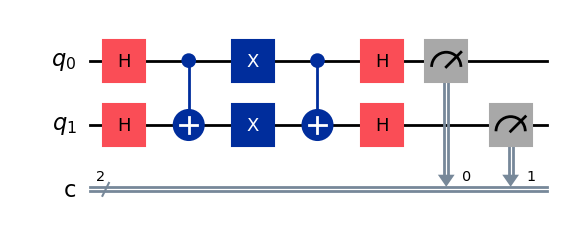

In [9]:
# Draw the circuit before transpilation
qc.draw('mpl') 
plt.show()

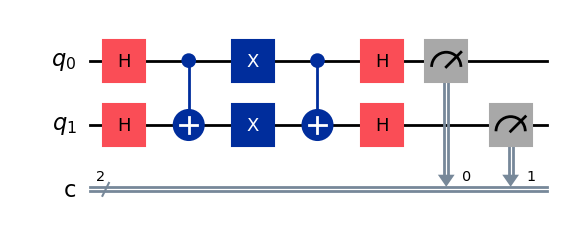

In [10]:
# Draw the circuit after transpilation 
compiled_circuit.draw('mpl')
plt.show()

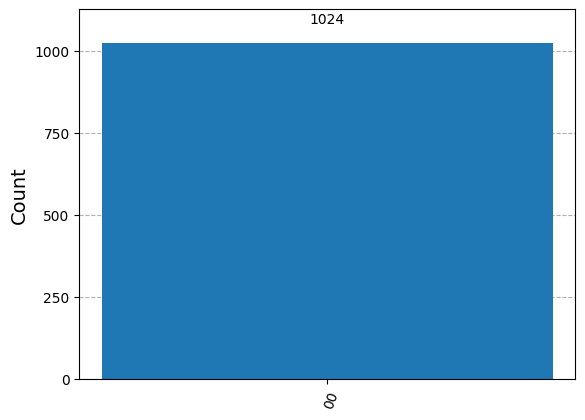

In [11]:
# Plot the results as a histogram
plot_histogram(counts)
plt.show()